# Data Denizens Progress Report
By: Chi Hieu Nguyen, Jesus Rojas, Daniel Rodriguez, Dinh Dang Khoa Tran, Duc Tam Nguyen

### Project Introduction
Our data science project seeks to analyze and predict the playoff performance of NBA teams and individual players using a combination of regular season statistics and performance against playoff-caliber opponents. The goal is to determine whether we can accurately forecast postseason outcomes, such as a team’s playoff success or a player's postseason statline, based on regular season trends and contextualized performance data.
One of the core issues with evaluating NBA performance is the distinct contrast between the regular season and the playoffs. Playoff games feature slower pace, increased defensive intensity, tighter rotations, and more targeted game planning. As a result, regular season metrics do not always carry over and some teams and players excel when the stakes are lower, while others elevate their game under pressure. This is an important issue for our stakeholders (NBA coaches, teams, analysts, and fans) because we seek to provide meaningful insight to the most important stretch of games in the NBA. This insight will be greatly important for teams because many teams head into the postseason wondering which players they should play to increase their chances of winning.
To address this, we’re going beyond just overall regular season stats and win percentage. Another key feature of our approach is to isolate regular season performance against other playoff-bound teams, under the assumption that these matchups more closely reflect the intensity and structure of playoff basketball. By focusing on how teams fare against high-level competition, we hope to identify patterns that traditional season-long averages might hide. Our interest in this topic stems from both a passion for basketball and the analytical challenges the NBA presents. With its rich dataset and clear regular season vs. postseason split, the NBA offers an ideal setting to explore how performance under pressure can be modeled and understood.

### Changes from Original Proposal
One change that was made from the original proposal was to predict the matchday performance of NBA players in the playoffs. Previously, we were going to predict the performance of players in the regular season as that was the stretch of games that were still occurring at the moment, but now the NBA is heading into the playoffs, so we decided to focus on this stretch of games instead. Another change that was made from the original proposal is to include more data from previous NBA seasons. Previously, we planned on using only the regular season for 2024-2025, but we quickly realized that we need to provide other years for our model to train on so it can accurately predict playoff outcomes. That is why we decided on using the previous three years of regular season and playoff data in our approach.

### Data cleaning
Data cleaning is done in the team_individual_stat file. The following steps were performed to clean the dataset.
 Step 1:
All column names are converted to uppercase (and extra whitespace is removed) to ensure consistency in later steps.

Steps 2 & 3:
Duplicate rows are removed, and columns that are not relevant (any column with "RANK" in its name plus extra identifier columns like NICKNAME, W, L, and W_PCT) are dropped.

Step 4:
Rows with any missing values are dropped to ensure data integrity.

Step 5:
The function attempts to convert columns (except for key non-numeric ones like PLAYER_NAME, TEAM_ABBREVIATION, and SEASON) to numeric types, which facilitates any numerical analysis.

Step 6:
Column names are ensured to remain uppercase and stripped of whitespace.


In [10]:
import pandas as pd
import team_individual_stat

# Now you can use the function in your notebook:
df = pd.read_csv('player_per_game_stats_regular_2425.xls')
df = team_individual_stat.wrangle_player_performance(df)
df.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,MIN,FGM,FGA,FG_PCT,...,TOV,STL,BLK,PF,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,SEASON
0,1630639,A.J. Lawson,1610612761,TOR,24.0,20,17.1,2.8,7.0,0.400,...,0.4,0.3,0.2,1.6,8.1,-0.9,14.2,1,0,2024-25
1,1631260,AJ Green,1610612749,MIL,25.0,66,22.6,2.5,5.9,0.423,...,0.6,0.5,0.1,2.2,7.4,1.7,13.6,0,0,2024-25
2,1642358,AJ Johnson,1610612764,WAS,20.0,23,18.8,2.6,6.2,0.415,...,1.1,0.4,0.1,1.1,7.0,-2.3,13.6,0,0,2024-25
3,203932,Aaron Gordon,1610612743,DEN,29.0,46,27.8,5.0,9.4,0.530,...,1.4,0.4,0.2,1.6,14.3,5.7,25.5,3,0,2024-25
4,1628988,Aaron Holiday,1610612745,HOU,28.0,57,12.8,1.8,4.2,0.430,...,0.6,0.3,0.2,1.0,5.3,1.6,9.7,0,0,2024-25


## EDA & Visualization

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import player_visuals
import team_visuals
import get_data
from get_data import fetch_bbr_player_avg_stats, fetch_bbr_playoffs_stats

### Data Preparation

First, we need to fetch and preprocess our data using out data cleaner.

In [12]:
from player_visuals import load_all_stats, compare_fg_percentage, plot_fg_percentage_scatter

regular_stats, playoff_stats = load_all_stats()

Fetching data for multiple seasons...
Combined regular season data shape: (2229, 30)
Combined playoff data shape: (648, 30)


In [13]:
regular_stats.describe().round(2)

,age,team,g,gs,mp,fg,fga,fgpct,3p,3pa,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season
count,2226.00,2229.0,2226.00,2226.00,2226.00,2226.00,2226.00,2203.00,2226.00,2226.00,...,2226.00,2226.00,2226.00,2226.00,2226.00,2226.00,2226.00,2226.00,2226.00,2229.0
mean,26.08,0.0,40.11,18.29,18.63,3.02,6.56,0.45,0.92,2.64,...,0.82,2.52,3.34,1.91,0.59,0.37,0.99,1.56,8.20,0.0
std,4.24,0.0,25.58,24.85,9.62,2.32,4.74,0.12,0.85,2.20,...,0.74,1.75,2.32,1.84,0.41,0.38,0.79,0.80,6.42,0.0
min,19.00,0.0,1.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
25%,23.00,0.0,16.00,0.00,11.10,1.30,3.10,0.40,0.20,0.90,...,0.30,1.30,1.70,0.70,0.30,0.10,0.43,1.00,3.50,0.0
50%,25.00,0.0,41.00,5.00,17.70,2.40,5.20,0.45,0.70,2.20,...,0.60,2.20,2.90,1.30,0.50,0.30,0.80,1.60,6.50,0.0
75%,29.00,0.0,64.00,29.00,26.58,4.10,8.80,0.50,1.40,3.90,...,1.10,3.40,4.40,2.50,0.80,0.50,1.30,2.10,11.00,0.0
max,42.00,0.0,84.00,83.00,43.50,11.50,23.60,1.00,4.90,11.80,...,5.10,11.00,14.70,10.90,3.00,3.60,4.80,5.00,34.70,0.0


## Regular Season vs. Playoff Performance

### Hypothesis: Players shoot differently in playoffs compared to regular season

It's crucial to know which players maintain or do better in high pressure playoff situations. We can compare field goal percentages between regular season and playoffs to find any patterns.

In [14]:
compare_fg_percentage(regular_stats, playoff_stats)

Number of player-seasons in both regular season and playoffs: 2304
Average difference in FG% (Playoff - Regular): -0.0180
Players with improved FG% in playoffs: 457 (35.7%)
Players with declined FG% in playoffs: 815 (63.6%)
Players with unchanged FG% in playoffs: 9 (0.7%)


In [15]:
plot_fg_percentage_scatter(regular_stats, playoff_stats)

### Visualization

In [16]:
from team_visuals import analyze_win_percentages, team_abbreviation_map, playoff_teams, western_teams, eastern_teams
df_schedule = get_data.fetch_regular_season_schedule(season='2024-25')

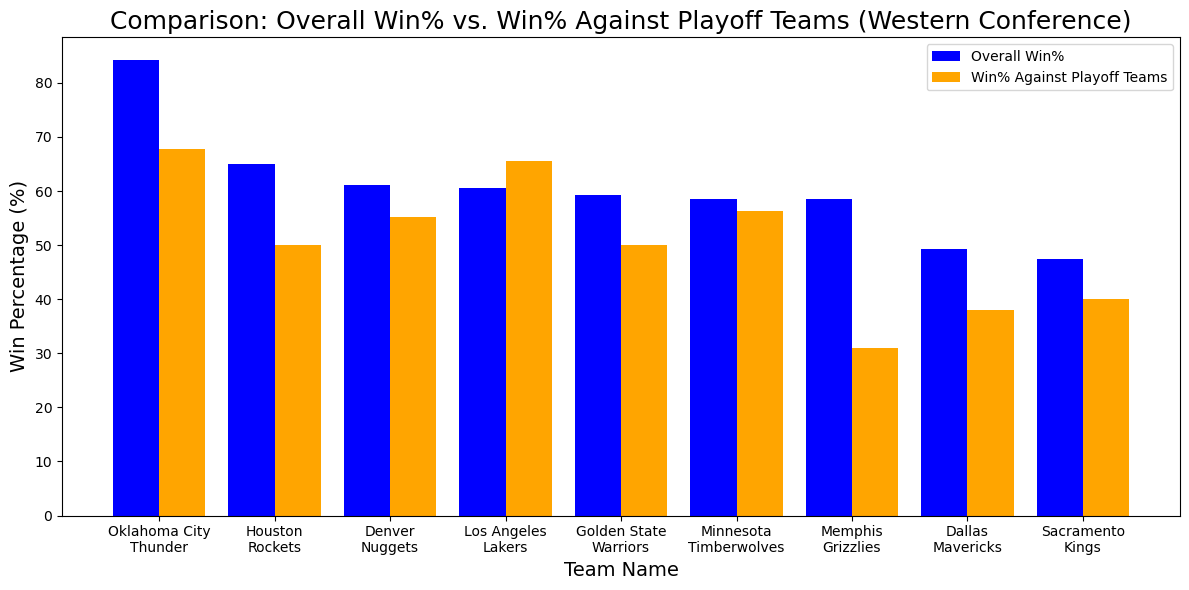

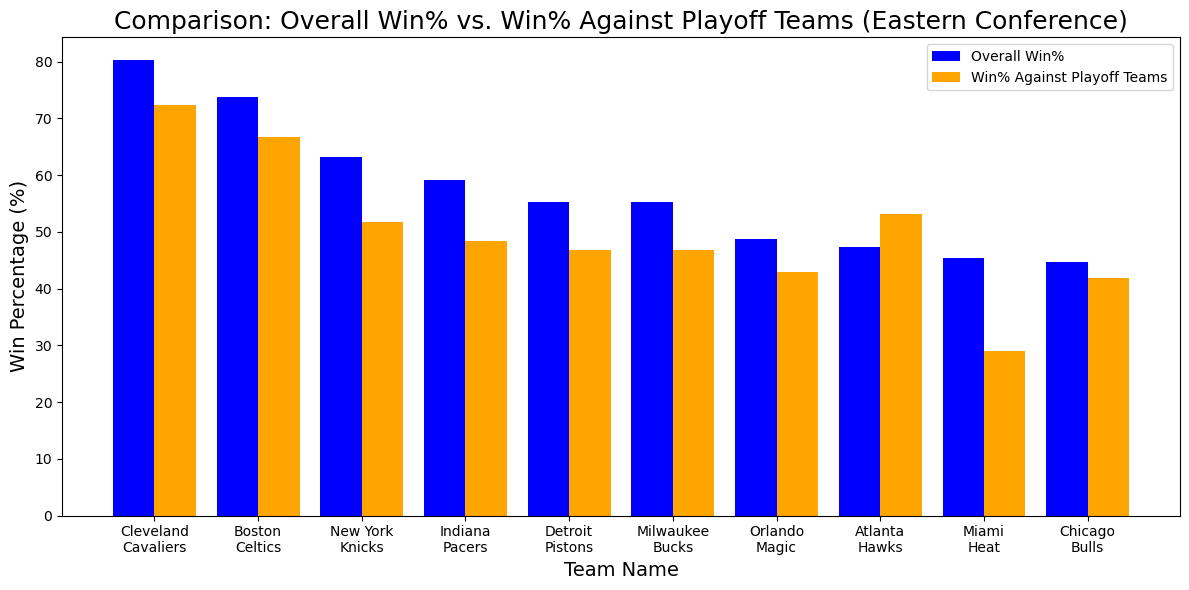

In [17]:
western_df = analyze_win_percentages(df_schedule, team_abbreviation_map, playoff_teams, western_teams, 'Western')
eastern_df = analyze_win_percentages(df_schedule, team_abbreviation_map, playoff_teams, eastern_teams, 'Eastern')

##### Column names in the cleaned dataset

In [18]:
#dataset.columns

### ML analysis


**Model**

explain how we picked and used our model, 

### Reflection: 
The hardest part that we have encountered was the exploration process of finding the right relationships between statistics that legitimately impacted playoff outcomes. Our whole group engaged in EDA's with the data and we were only able to find a handful of insightful relationships. However, now that we have found these relationships, we can build off of them and continue to delve deeper into exploring them.

We have confirmed the negative relationship that most players have with playoff performance vs. regular season performance, as most players tend to see a downtick in their field goal percentage in the playoffs.

The current biggest problem that we are facing is that... (To be determined)

The results that we have gotten indicate that we are on the right track and also prove our initial hypotheses. The relationship between field goal percentage in the playoffs vs. regular season is that in the playoffs players typically shoot lower than their average for the regular season. Additionally, teams that have a lower win percentage against playoff caliber teams typically do not have great success in the playoffs. Given these findings, we believe that it is worth proceeding with the project as we can continue to find more metrics that determine playoff success for struggling teams and we can also find players that should be played more given other metrics (assists, rebounds, steals, etc).

### Next steps: 
We plan to expand our dataset by getting the previous three years of regular season and playoff statistics. Additionally, we will continue to work on our Models to find the best Model for predicting certain outcomes.